In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('final_dataset.csv')

In [2]:
df

,Day,Time_Segment,Accidents,Week_day,Day_month,Month,TM,PPT,VVM10,Exceeds Threshold,Holiday,Vacation_week,Weekend Return,Season
0,2021-01-01,2-6,0,Friday,1,1,Low,Low,Medium,0,No,1,No,Winter
1,2021-01-01,6-10,0,Friday,1,1,Low,Low,Medium,0,No,1,No,Winter
2,2021-01-01,10-14,5,Friday,1,1,Low,Low,Medium,1,No,1,No,Winter
3,2021-01-01,14-18,0,Friday,1,1,Low,Low,Medium,0,No,1,No,Winter
4,2021-01-01,18-22,7,Friday,1,1,Low,Low,Medium,1,No,1,No,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2022-12-31,6-10,1,Saturday,31,12,Medium,None,Medium,0,Yes,1,No,Winter
4376,2022-12-31,10-14,6,Saturday,31,12,Medium,None,Medium,1,Yes,1,No,Winter
4377,2022-12-31,14-18,4,Saturday,31,12,Medium,None,Medium,1,Yes,1,No,Winter
4378,2022-12-31,18-22,5,Saturday,31,12,Medium,None,Medium,1,Yes,1,No,Winter


In [ ]:
# Reemplazar 1 por 'Yes' y 0 por 'No' en la columna 'Week_holiday'
#df2=df
#df2['Vacation_week'] = df2['Vacation_week'].replace({1: 'Yes', 0: 'No'})


In [ ]:
#df3=df2[['Time_Segment', 'Holiday', 'Vacation_week', 'Weekend Return','Season', 'Exceeds Threshold']].head(10)
#df3

In [5]:
df[['Time_Segment', 'Holiday', 'Weekend Return', 'VVM10', 'Season', 'Exceeds Threshold']].head(10)

,Time_Segment,Holiday,Weekend Return,VVM10,Season,Exceeds Threshold
0,2-6,No,No,Medium,Winter,0
1,6-10,No,No,Medium,Winter,0
2,10-14,No,No,Medium,Winter,1
3,14-18,No,No,Medium,Winter,0
4,18-22,No,No,Medium,Winter,1
5,22-2,No,No,Medium,Winter,0
6,2-6,Yes,No,Medium,Winter,0
7,6-10,Yes,No,Medium,Winter,0
8,10-14,Yes,No,Medium,Winter,1
9,14-18,Yes,No,Medium,Winter,1


In [6]:
import lightgbm as lgb
mapeo = {'Yes': 1, 'No': 0}
df['Holiday'] = df['Holiday'].map(mapeo)
df['Weekend Return'] = df['Weekend Return'].map(mapeo)
X = df[['Time_Segment', 'Holiday', 'Weekend Return', 'VVM10', 'Season']]
y=df['Exceeds Threshold']

# Convert categorical variables to numerical format using one-hot encoding
X = pd.get_dummies(X, columns=['Time_Segment', 'Season', 'VVM10'])



In [17]:
len(df)*0.7

3066.0

In [24]:
df[3066:].head(7)

,Day,Time_Segment,Accidents,Week_day,Day_month,Month,TM,PPT,VVM10,Exceeds Threshold,Holiday,Vacation_week,Weekend Return,Season
3066,2022-05-27,2-6,0,Friday,27,5,Medium,None,Medium,0,0,1,0,Spring
3067,2022-05-27,6-10,6,Friday,27,5,Medium,None,Medium,1,0,1,0,Spring
3068,2022-05-27,10-14,10,Friday,27,5,Medium,None,Medium,1,0,1,0,Spring
3069,2022-05-27,14-18,6,Friday,27,5,Medium,None,Medium,1,0,1,0,Spring
3070,2022-05-27,18-22,11,Friday,27,5,Medium,None,Medium,1,0,1,0,Spring
3071,2022-05-27,22-2,1,Friday,27,5,Medium,None,Medium,0,0,1,0,Spring
3072,2022-05-28,2-6,0,Saturday,28,5,Medium,None,Medium,0,1,1,0,Spring


In [7]:
#Manually split the dataset (70% train, 30% test)
split_index = int(len(df) * 0.7)
X_train, X_test = X[:split_index], X[split_index:] 
y_train, y_test = y[:split_index], y[split_index:]

#Define the grid of hyperparameters to search
param_grid = { 'num_leaves': [31, 62, 127],
              'max_depth': [3, 4, 5, 6],
              'learning_rate': [0.01, 0.05, 0.1],
              'n_estimators': [100, 200, 400] }

# Initialize the LightGBM model
model = lgb.LGBMClassifier()

model.fit(X_train, y_train) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1466, number of negative: 1600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 3066, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478147 -> initscore=-0.087466
[LightGBM] [Info] Start training from score -0.087466


LGBMClassifier()

In [8]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.773972602739726

Test Set Accuracy: 0.773972602739726
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       684
           1       0.74      0.82      0.78       630

    accuracy                           0.77      1314
   macro avg       0.78      0.78      0.77      1314
weighted avg       0.78      0.77      0.77      1314

Confusion Matrix:
[[499 185]
 [112 518]]


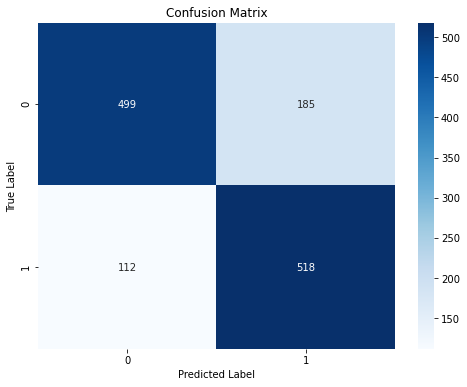

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get predictions for the test set using the best model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Calculate other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [10]:
import pandas as pd

# Get predictions for the test set using the best model
y_pred = model.predict(X_test)

# Create a DataFrame containing test set features and predicted labels
predictions_df = pd.DataFrame(X_test, columns=X.columns)  # Assuming X is your feature matrix
predictions_df['True Label'] = y_test
predictions_df['Predicted Label'] = y_pred

# Display the DataFrame
predictions_df


,Holiday,Weekend Return,Time_Segment_10-14,Time_Segment_14-18,Time_Segment_18-22,Time_Segment_2-6,Time_Segment_22-2,Time_Segment_6-10,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,VVM10_High,VVM10_Low,VVM10_Medium,True Label,Predicted Label
3066,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3067,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1
3068,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1
3069,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1
3070,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4376,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4377,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1
4378,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1


In [25]:
predictions_df.head(6)

,Holiday,Weekend Return,Time_Segment_10-14,Time_Segment_14-18,Time_Segment_18-22,Time_Segment_2-6,Time_Segment_22-2,Time_Segment_6-10,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,VVM10_High,VVM10_Low,VVM10_Medium,True Label,Predicted Label
3066,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3067,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1
3068,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1
3069,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1
3070,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1
3071,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


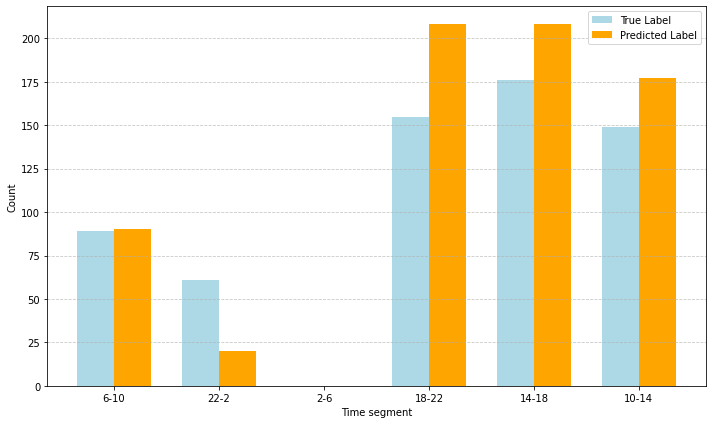

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame de ejemplo (reemplaza esto con tu DataFrame real)
df1 = predictions_df

# Agrupar por franja horaria y contar las ocurrencias de 'True Label' y 'Predicted Label'
grouped = df1.groupby(['Time_Segment_10-14', 'Time_Segment_14-18', 'Time_Segment_18-22', 'Time_Segment_2-6', 'Time_Segment_22-2', 'Time_Segment_6-10'])[['True Label', 'Predicted Label']].sum().reset_index()

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Obtener los índices de las franjas horarias
x = range(len(grouped))

# Ancho de cada barra
width = 0.35

# Graficar las barras para 'True Label'
plt.bar(x, grouped['True Label'], width, color='lightblue', label='True Label')

# Graficar las barras para 'Predicted Label' (desplazadas hacia la derecha)
plt.bar([i + width for i in x], grouped['Predicted Label'], width, color='orange', label='Predicted Label')

# Personalizar el gráfico
plt.xlabel('Time segment')
plt.ylabel('Count')
plt.xticks([i + width/2 for i in x], ['6-10', '22-2', '2-6','18-22', '14-18', '10-14'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('nombre_del_archivo.png', dpi=1000)
plt.show()

